In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

### Documentation
- Import necessary libraries
- load datasets

In [2]:
url_1 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv"
url_1

'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'

In [3]:
df_1 = pd.read_csv(url_1)
df_1.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


### Data Understanding of Data 1

In [4]:
df_1.shape

(4368, 10)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [6]:
df_1.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

### Note
- one column is having missing value (referredby), the column can be drop not necessary for prediction.
- Target column is the good_bad_flag.


### Data Cleaning 

In [7]:
#clean the approveddate and creationdate
from datetime import date

In [8]:
df_1['approveddate'] = pd.to_datetime(df_1['approveddate'], errors = 'coerce').dt.date

In [9]:
df_1['creationdate'] = pd.to_datetime(df_1['creationdate'], errors = 'coerce').dt.date

In [10]:
df_1.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,NaN,Good


In [11]:
df_1.sample(5)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
3423,8a858efd5ca70688015ca7ead745627c,301963434,2,2017-07-04,2017-07-04,10000.0,13000.0,30,8a858f285c7d70a4015c7d86438a0fa5,Bad
3980,8a858f725b49c0c0015b4de5320b0e90,301995663,2,2017-07-25,2017-07-25,10000.0,13000.0,30,NaN,Bad
2497,8a858e765507208301552107bcd95612,302003510,9,2017-07-30,2017-07-30,15000.0,18375.0,30,NaN,Good
833,8a858f0f5bfd79d2015c08207d265627,301958937,4,2017-07-01,2017-07-01,20000.0,24500.0,30,NaN,Good
3730,8a858e985b1de32c015b1ed1acf57e0f,301995183,4,2017-07-25,2017-07-25,10000.0,11500.0,15,NaN,Good


In [12]:
#...drop column
df_1 = df_1.drop('referredby', axis= 1)
df_1.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good


#### load data 2

In [13]:
url_2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'
url_2

'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'

In [14]:
df_2 = pd.read_csv(url_2)
df_2.head(10)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
5,8a858f045bc9690c015bca251e9a4e95,1978-12-11 00:00:00.000000,Savings,3.330087,6.552518,GT Bank,NaN,Permanent,NaN
6,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN
7,8a858f275c451af5015c546a50ce55ed,1986-09-09 00:00:00.000000,Savings,4.734382,7.606868,GT Bank,NaN,Permanent,NaN
8,8a858f405d13c45f015d13dd93ec0c1c,1992-11-17 00:00:00.000000,Savings,3.290590,6.612075,EcoBank,NaN,Permanent,NaN
9,8a858f735c161bda015c164d86632026,1965-02-23 00:00:00.000000,Savings,3.362783,6.509418,EcoBank,NaN,Permanent,NaN


### Data Understanding of Data 2

In [15]:
df_2.shape

(4346, 9)

In [16]:
df_2.sample(10)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4181,8a858f61560bc0e501561316091908f7,1992-06-09 00:00:00.000000,Other,3.537833,6.462147,GT Bank,NaN,Self-Employed,Graduate
2390,8a858ee35b43ae27015b43b3f6d0059b,1983-05-29 00:00:00.000000,Savings,4.047638,7.373851,FCMB,NaN,Permanent,NaN
2731,8a858f255ca276c5015ca6175ff526db,1987-01-28 00:00:00.000000,Savings,3.355738,6.504067,GT Bank,NaN,Permanent,NaN
1282,8a858e1e5b1fc4ad015b1fc9fd66028a,1975-06-05 00:00:00.000000,Savings,3.872972,7.313152,Fidelity Bank,NaN,Permanent,NaN
2614,8a85886e54101890015410e563b4325b,1986-09-02 00:00:00.000000,Savings,3.618242,6.473886,GT Bank,NaN,Permanent,Post-Graduate
3043,8a858f5e599783c0015997c56ef70ffa,1976-05-09 00:00:00.000000,Savings,3.305550,6.510357,GT Bank,NaN,NaN,NaN
1676,8a858f305c8dd672015c9b0451ec3125,1985-05-13 00:00:00.000000,Savings,3.381982,6.492767,Fidelity Bank,NaN,Permanent,NaN
2775,8a8589045384bd8301539e7e9cd27c7c,1985-03-19 00:00:00.000000,Savings,3.290275,6.620745,Diamond Bank,NaN,Permanent,NaN
450,8a858ef25cd0c652015cd46515a128be,1985-10-01 00:00:00.000000,Savings,7.353175,9.142564,EcoBank,NaN,Permanent,NaN
4055,8a858e245b680423015b8056f2c015eb,1986-11-24 00:00:00.000000,Savings,5.183781,7.239749,Sterling Bank,NaN,Permanent,NaN


In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [18]:
df_2.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

### Note
- missing values
- bank_branch_clients
- employment_status_clients
- level_of_education_clients

In [19]:
df_2.bank_account_type.unique()

array(['Savings', 'Other', 'Current'], dtype=object)

In [20]:
df_2.bank_name_clients.unique()

array(['GT Bank', 'Sterling Bank', 'Fidelity Bank', 'Access Bank',
       'EcoBank', 'FCMB', 'Skye Bank', 'UBA', 'Zenith Bank',
       'Diamond Bank', 'First Bank', 'Union Bank', 'Stanbic IBTC',
       'Standard Chartered', 'Heritage Bank', 'Keystone Bank',
       'Unity Bank', 'Wema Bank'], dtype=object)

In [21]:
df_2.bank_branch_clients.unique()

array([nan, 'LAGOS', 'LADIPO', 'AWOLOWO', 'OGBA', 'AJOSE ADEOGUN',
       'ABULE EGBA', 'OREGUN', 'ABEOKUTA', 'TRANS AMADI',
       'OBA AKRAN BERGER PAINT', 'APAPA', 'BOSSO ROAD, MINNA',
       'DUGBE, IBADAN', 'ALAUSA', 'OJUELEGBA', 'MUSHIN BRANCH', 'AKUTE',
       'OBA ADEBIMPE', 'STERLING BANK PLC 102, IJU ROAD, IFAKO BRANCH',
       'MEDICAL ROAD IKEJA', 'ADENIRAN OGUNSANYA', 'OBA AKRAN',
       '40,SAPELE ROAD ,OPPOSITE DUMAZ JUNCTION BENIN CITY EDO STATE.',
       'ACCESS BANK PLC, CHALLENGE ROUNDABOUT IBADAN, OYO STATE.',
       'ABULE EGBA U-TURN,BRANCH', 'OGUDU, OJOTA',
       'OBA AKRAN ROAD, IKEJA,', '47 LAGOS ROAD, IKORODU', 'OAU ILE IFE',
       'RING ROAD',
       'PLOT 999C DANMOLE STREET, ADEOLA ODEKU, VICTORIA ISLAND, LAGOS',
       'HERITAGE BANK, DUGBE, IBADAN', 'ADEOLA HOPEWELL',
       'WHARF ROAD, APAPA', 'ILUPEJU', 'AKOWONJO', 'DUGBE,IBADAN',
       'HEAD OFFICE', 'GBAGADA', 'LEKKI EPE', 'MAFOLUKU', 'AKURE BRANCH',
       '17, SANUSI FAFUNWA STREET, VICTORIA ISL

In [22]:
df_2['bank_branch_clients'] = df_2['bank_branch_clients'].replace({
    "DUGBE, IBADAN" : "DUGBE,IBADAN",
    "OBA AKRAN" : "OBA AKRAN ROAD, IKEJA"
})
    

In [23]:
df_2.bank_branch_clients.value_counts()

bank_branch_clients
OGBA                                                              3
DUGBE,IBADAN                                                      2
AJOSE ADEOGUN                                                     2
OREGUN                                                            2
APAPA                                                             2
HEAD OFFICE                                                       2
ILUPEJU                                                           1
47 LAGOS ROAD, IKORODU                                            1
OAU ILE IFE                                                       1
RING ROAD                                                         1
PLOT 999C DANMOLE STREET, ADEOLA ODEKU, VICTORIA ISLAND, LAGOS    1
HERITAGE BANK, DUGBE, IBADAN                                      1
ADEOLA HOPEWELL                                                   1
WHARF ROAD, APAPA                                                 1
LAGOS                       

In [24]:
df_2['bank_branch_clients'] = df_2['bank_branch_clients'].replace({
    "OBA AKRAN ROAD, IKEJA," : "OBA AKRAN ROAD, IKEJA"
})

In [25]:
df_2 = df_2.drop('bank_branch_clients', axis= 1)

In [26]:
df_2.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,NaN


In [28]:
df_2.level_of_education_clients.unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [29]:
df_2.level_of_education_clients.value_counts()

level_of_education_clients
Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: count, dtype: int64

In [30]:
df_2.level_of_education_clients

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4341    Graduate
4342         NaN
4343         NaN
4344     Primary
4345         NaN
Name: level_of_education_clients, Length: 4346, dtype: object

In [31]:
df_2['level_of_education_clients'] = df_2['level_of_education_clients'].fillna(df_2['level_of_education_clients'].mode()[0])

In [32]:
df_2.employment_status_clients.unique()

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

In [33]:
df_2.employment_status_clients.value_counts()

employment_status_clients
Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

In [34]:
df_2.employment_status_clients

0             NaN
1       Permanent
2             NaN
3       Permanent
4       Permanent
          ...    
4341    Permanent
4342          NaN
4343    Permanent
4344    Permanent
4345    Permanent
Name: employment_status_clients, Length: 4346, dtype: object

In [35]:
df_2['employment_status_clients'] = df_2['employment_status_clients'].fillna(df_2['employment_status_clients'].mode()[0])

In [36]:
df_2['birthdate'] = pd.to_datetime(df_2['birthdate'], errors = 'coerce')

In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4346 non-null   object        
 1   birthdate                   4346 non-null   datetime64[ns]
 2   bank_account_type           4346 non-null   object        
 3   longitude_gps               4346 non-null   float64       
 4   latitude_gps                4346 non-null   float64       
 5   bank_name_clients           4346 non-null   object        
 6   employment_status_clients   4346 non-null   object        
 7   level_of_education_clients  4346 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 271.8+ KB


In [38]:
df_2.isna().sum()

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
dtype: int64

In [39]:
df_2.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Permanent,Graduate
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent,Graduate
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,Permanent,Graduate
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,Permanent,Graduate


### Load Data 3

In [40]:
url_3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'
url_3

'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [41]:
df_3 = pd.read_csv(url_3)
df_3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


### Data Understanding of Data 3

In [42]:
df_3.shape

(18183, 12)

In [43]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [44]:
df_3.isna().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

### Note
- missing value (referredby), not necessary for prediction

In [45]:
df_3.duplicated().sum()

0

In [46]:
df_3.loc[df_3.duplicated(subset=['customerid'])]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
6,8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,NaN,2017-07-04 00:00:00.000000,2017-07-03 23:25:29.000000
10,8a858e1158dc4d830158f7bde4f47ea7,301873260,7,2017-04-19 12:35:52.000000,2017-04-19 11:35:44.000000,30000.0,34400.0,30,2017-05-19 22:12:16.000000,NaN,2017-05-19 00:00:00.000000,2017-05-19 21:57:07.000000
14,8a858e4456ced8470156dc8f1f4038d3,301878488,8,2017-04-24 12:03:33.000000,2017-04-24 11:03:26.000000,30000.0,34400.0,30,2017-05-24 16:17:14.000000,NaN,2017-05-24 00:00:00.000000,2017-05-24 16:02:04.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18177,8a858ff455a09f5a0155ba378c9b10bc,301774291,6,2016-12-15 09:29:59.000000,2016-12-15 08:29:49.000000,30000.0,36800.0,60,2017-02-06 08:00:39.000000,NaN,2017-01-16 00:00:00.000000,2017-01-17 10:58:19.000000
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000


### Merging
- merging the performance data (data 1) and demographic data (data 2) together for prediction.

In [47]:
df_merged = pd.merge( df_1, df_2, on = 'customerid', how = 'left')

df_merged

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Graduate
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Graduate
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30,2017-07-30,10000.0,13000.0,30,Bad,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27,2017-07-27,10000.0,13000.0,30,Bad,1989-12-04,Savings,4.607358,8.460608,FCMB,Permanent,Graduate
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25,2017-07-25,10000.0,11500.0,15,Bad,1989-11-21,Savings,3.976842,7.409129,First Bank,Permanent,Graduate
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14,2017-07-14,10000.0,13000.0,30,Bad,1990-06-11,Savings,3.986089,7.386796,Skye Bank,Permanent,Graduate


In [48]:
df_merged.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
employment_status_clients     1099
level_of_education_clients    1099
dtype: int64

### Merging Observation
- There are missing values for the below-listed columns
- birthdate
- bank_account_type
- longitude_gps
- latitude_gps
- bank_name_clients
- employment_status_clients
- level_of_education_clients  1099

In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   object        
 4   creationdate                4376 non-null   object        
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   object        
 9   birthdate                   3277 non-null   datetime64[ns]
 10  bank_account_type           3277 non-null   object        
 11  longitude_gps               3277 non-null   float64     

In [50]:
df_merged.shape

(4376, 16)

In [52]:
df_merged

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Graduate
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Graduate
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30,2017-07-30,10000.0,13000.0,30,Bad,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27,2017-07-27,10000.0,13000.0,30,Bad,1989-12-04,Savings,4.607358,8.460608,FCMB,Permanent,Graduate
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25,2017-07-25,10000.0,11500.0,15,Bad,1989-11-21,Savings,3.976842,7.409129,First Bank,Permanent,Graduate
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14,2017-07-14,10000.0,13000.0,30,Bad,1990-06-11,Savings,3.986089,7.386796,Skye Bank,Permanent,Graduate


In [53]:
df_merged.duplicated().sum()

8

In [54]:
df_merged.loc[df_merged.duplicated()]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
522,8a858fe65675195a015679452588279c,301973257,10,2017-07-11,2017-07-11,40000.0,48000.0,60,Good,1982-08-01,Savings,7.533646,9.046885,UBA,Permanent,Graduate
894,8a858f9f5679951a01567a5b90644817,301969153,3,2017-07-08,2017-07-08,10000.0,13000.0,30,Good,1984-12-17,Savings,4.196662,12.429509,Access Bank,Permanent,Graduate
1073,8a858e6c5c88d145015c8b9627cd5a48,301973324,2,2017-07-11,2017-07-11,10000.0,13000.0,30,Good,1979-09-30,Savings,3.367008,6.497313,Sterling Bank,Permanent,Graduate
1604,8a858ec65cc6352b015cc64525ea0763,301968904,2,2017-07-08,2017-07-08,10000.0,13000.0,30,Good,1985-01-30,Savings,3.845728,7.411737,GT Bank,Permanent,Graduate
2385,8a858fe05d421ff4015d4c87d2a21ceb,301994359,2,2017-07-24,2017-07-24,10000.0,13000.0,30,Bad,1983-01-20,Savings,8.526960,12.023015,Skye Bank,Permanent,Graduate
2665,8a858f1e5cc4bc81015cc548e1eb5206,301982397,2,2017-07-17,2017-07-17,10000.0,13000.0,30,Good,1979-09-15,Savings,6.285242,4.922719,UBA,Permanent,Graduate
3789,8a858fc75cd62882015cdaf2f4311b3f,301983655,2,2017-07-18,2017-07-18,10000.0,11500.0,15,Good,1975-10-27,Savings,7.437607,9.088935,GT Bank,Permanent,Graduate
3898,8a858f1e5baffcc9015bb02b505f180d,301983018,5,2017-07-18,2017-07-18,20000.0,24500.0,30,Good,1983-04-06,Savings,6.969350,4.818535,GT Bank,Permanent,Graduate


In [55]:
df_merged_missing = df_merged.isna().mean() * 100

df_merged_missing

customerid                     0.00000
systemloanid                   0.00000
loannumber                     0.00000
approveddate                   0.00000
creationdate                   0.00000
loanamount                     0.00000
totaldue                       0.00000
termdays                       0.00000
good_bad_flag                  0.00000
birthdate                     25.11426
bank_account_type             25.11426
longitude_gps                 25.11426
latitude_gps                  25.11426
bank_name_clients             25.11426
employment_status_clients     25.11426
level_of_education_clients    25.11426
dtype: float64

In [56]:
(df_merged.isna().sum().sort_values(ascending=False) / len (df_merged)) * 100

birthdate                     25.11426
bank_account_type             25.11426
longitude_gps                 25.11426
latitude_gps                  25.11426
bank_name_clients             25.11426
employment_status_clients     25.11426
level_of_education_clients    25.11426
customerid                     0.00000
systemloanid                   0.00000
loannumber                     0.00000
approveddate                   0.00000
creationdate                   0.00000
loanamount                     0.00000
totaldue                       0.00000
termdays                       0.00000
good_bad_flag                  0.00000
dtype: float64

In [57]:
missing_df_1 = set(df_2['customerid']) - set(df_1['customerid'])
missing_df_2 = set(df_1['customerid']) - set(df_2['customerid'])

print('missing value in df_1:', len(missing_df_1))
print('missing value in df_2:', len(missing_df_2))


missing value in df_1: 1065
missing value in df_2: 1099


##### Observation
The missing value after merging is 25% that is too much to drop. because the dataset is not a large dataset.

### Feature Engineering

In [58]:
df_merged['birthdate'] = pd.to_datetime(df_merged['birthdate'], errors = 'coerce')

In [59]:
df_merged['approveddate'] = pd.to_datetime(df_merged['approveddate'], errors = 'coerce')

In [60]:
df_merged['Age'] = (df_merged['approveddate'] - df_merged['birthdate']).dt.days // 365

In [61]:
df_merged

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,31.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Graduate,32.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Graduate,39.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30,2017-07-30,10000.0,13000.0,30,Bad,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27,2017-07-27,10000.0,13000.0,30,Bad,1989-12-04,Savings,4.607358,8.460608,FCMB,Permanent,Graduate,27.0
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25,2017-07-25,10000.0,11500.0,15,Bad,1989-11-21,Savings,3.976842,7.409129,First Bank,Permanent,Graduate,27.0
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14,2017-07-14,10000.0,13000.0,30,Bad,1990-06-11,Savings,3.986089,7.386796,Skye Bank,Permanent,Graduate,27.0


In [62]:
df_merged['Age'].unique()

array([45., 31., 32., 39., 30., nan, 28., 29., 34., 52., 40., 38., 35.,
       41., 23., 24., 33., 26., 36., 42., 55., 46., 47., 37., 25., 21.,
       43., 22., 50., 27., 51., 44., 49., 48., 53., 54.])

In [63]:
df_merged.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,31.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Graduate,32.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Graduate,39.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary,30.0


In [64]:
df_merged['interest'] = df_merged['totaldue'] - df_merged['loanamount']

df_merged['loan_interest_pert'] = (df_merged['interest'] / df_merged['loanamount']) * 100
    

In [65]:
df_merged['loan_interest_pert']

0       15.00
1       15.00
2       11.25
3       15.00
4       10.00
        ...  
4371    30.00
4372    30.00
4373    15.00
4374    30.00
4375    15.00
Name: loan_interest_pert, Length: 4376, dtype: float64

In [66]:
df_merged['daily_int_pert'] = (df_merged['loan_interest_pert'] / df_merged['termdays']).round(2)

### Dealing with missing values in the merged dataset

In [67]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4376 non-null   object        
 1   systemloanid                4376 non-null   int64         
 2   loannumber                  4376 non-null   int64         
 3   approveddate                4376 non-null   datetime64[ns]
 4   creationdate                4376 non-null   object        
 5   loanamount                  4376 non-null   float64       
 6   totaldue                    4376 non-null   float64       
 7   termdays                    4376 non-null   int64         
 8   good_bad_flag               4376 non-null   object        
 9   birthdate                   3277 non-null   datetime64[ns]
 10  bank_account_type           3277 non-null   object        
 11  longitude_gps               3277 non-null   float64     

In [68]:
df_merged.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
employment_status_clients     1099
level_of_education_clients    1099
Age                           1099
interest                         0
loan_interest_pert               0
daily_int_pert                   0
dtype: int64

In [69]:
df_merged['bank_name_clients'].value_counts()

bank_name_clients
GT Bank               1210
First Bank             430
Access Bank            329
UBA                    269
Zenith Bank            224
Diamond Bank           216
Stanbic IBTC           117
EcoBank                116
FCMB                    89
Skye Bank               76
Fidelity Bank           74
Sterling Bank           43
Wema Bank               19
Heritage Bank           18
Union Bank              15
Keystone Bank           14
Standard Chartered      13
Unity Bank               5
Name: count, dtype: int64

In [70]:
df_merged['bank_name_clients'] = df_merged['bank_name_clients'].fillna(method='ffill')

In [71]:
df_merged['bank_name_clients'].value_counts()

bank_name_clients
GT Bank               1622
First Bank             581
Access Bank            434
UBA                    361
Diamond Bank           305
Zenith Bank            299
EcoBank                153
Stanbic IBTC           151
FCMB                   111
Fidelity Bank           97
Skye Bank               97
Sterling Bank           52
Wema Bank               26
Heritage Bank           23
Union Bank              22
Keystone Bank           19
Standard Chartered      18
Unity Bank               5
Name: count, dtype: int64

In [72]:
df_merged['bank_name_clients'].isna().sum()

0

In [73]:
df_merged['bank_account_type'].value_counts()

bank_account_type
Savings    2578
Other       653
Current      46
Name: count, dtype: int64

In [74]:
df_merged['bank_account_type'] = df_merged['bank_account_type'].fillna(method='ffill')

In [75]:
df_merged['bank_account_type'].value_counts()

bank_account_type
Savings    3427
Other       888
Current      61
Name: count, dtype: int64

In [76]:
df_merged['bank_account_type'].isna().sum()

0

In [77]:
df_merged['employment_status_clients'].value_counts()

employment_status_clients
Permanent        2841
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: count, dtype: int64

In [78]:
df_merged['employment_status_clients'] = df_merged['employment_status_clients'].fillna(method='ffill')

In [79]:
df_merged['employment_status_clients'].value_counts()

employment_status_clients
Permanent        3792
Self-Employed     369
Student           144
Unemployed         60
Contract            6
Retired             5
Name: count, dtype: int64

In [80]:
df_merged['employment_status_clients'].isna().sum()

0

In [81]:
df_merged['level_of_education_clients'].value_counts()

level_of_education_clients
Graduate         3155
Secondary          65
Post-Graduate      50
Primary             7
Name: count, dtype: int64

In [82]:
df_merged['level_of_education_clients'] = df_merged['level_of_education_clients'].fillna(method='ffill')

In [83]:
df_merged['level_of_education_clients'].value_counts()

level_of_education_clients
Graduate         4208
Secondary          89
Post-Graduate      67
Primary            12
Name: count, dtype: int64

In [84]:
df_merged['level_of_education_clients'].isna().sum()

0

<Axes: xlabel='Age', ylabel='Count'>

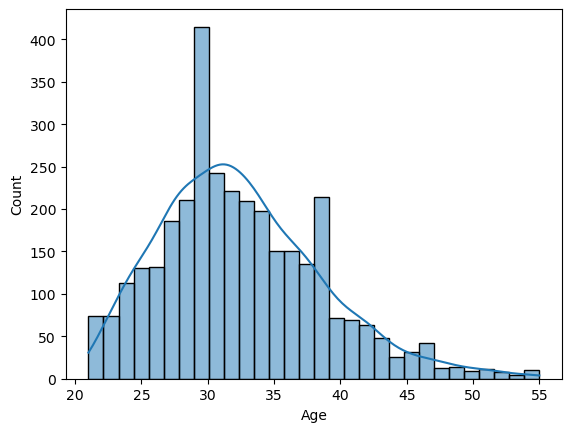

In [85]:
sns.histplot(df_merged['Age'], kde = True, bins = 30)

In [86]:
skew_value = df_merged['Age'].skew()
skew_value

0.688529651240783

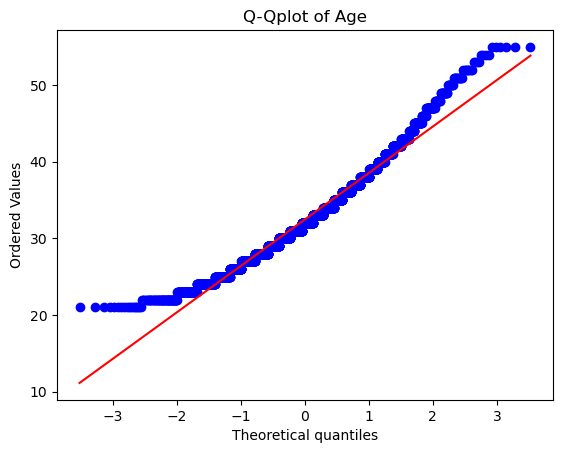

In [87]:
stats.probplot(df_merged['Age'].dropna(), dist='norm', plot=plt)
plt.title('Q-Qplot of Age')
plt.show()
          

### Note
- skew value for Age column is 0.6(moderately right skew)
- Q-Qplot show downward curve and upward curve
- it is safer to fill with median value

In [88]:
df_merged['Age'] = df_merged['Age'].fillna(df_merged['Age'].median())

In [89]:
df_merged['Age'].isna().sum()

0

<Axes: xlabel='Age', ylabel='Count'>

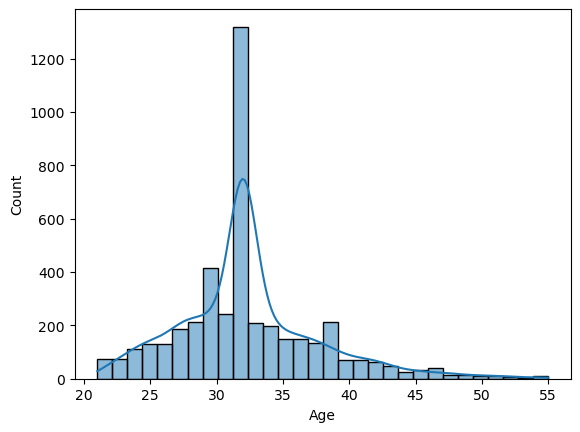

In [90]:
sns.histplot(data=df_merged['Age'], kde = True, bins = 30)

In [91]:
skew_value = df_merged['Age'].skew()
skew_value

0.8629029239023182

### Note
- The missing value in the underlisted columns are filled with forward fill('ffill')
- bank_name_clients
- bank_account_type
- employment_status_clients
- level_of_education_clients

- The Age column is filled with median

In [92]:
df_merged.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
birthdate                     1099
bank_account_type                0
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients                0
employment_status_clients        0
level_of_education_clients       0
Age                              0
interest                         0
loan_interest_pert               0
daily_int_pert                   0
dtype: int64

In [93]:
df_merged.approveddate.unique()

<DatetimeArray>
['2017-07-25 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00',
 '2017-07-27 00:00:00', '2017-07-03 00:00:00', '2017-07-19 00:00:00',
 '2017-07-10 00:00:00', '2017-07-24 00:00:00', '2017-07-26 00:00:00',
 '2017-07-17 00:00:00', '2017-07-02 00:00:00', '2017-07-28 00:00:00',
 '2017-07-18 00:00:00', '2017-07-07 00:00:00', '2017-07-01 00:00:00',
 '2017-07-30 00:00:00', '2017-07-13 00:00:00', '2017-07-11 00:00:00',
 '2017-07-04 00:00:00', '2017-07-21 00:00:00', '2017-07-12 00:00:00',
 '2017-07-23 00:00:00', '2017-07-08 00:00:00', '2017-07-29 00:00:00',
 '2017-07-22 00:00:00', '2017-07-16 00:00:00', '2017-07-20 00:00:00',
 '2017-07-15 00:00:00', '2017-07-14 00:00:00', '2017-07-09 00:00:00']
Length: 30, dtype: datetime64[ns]

In [94]:
df_merged.creationdate.unique()

array([datetime.date(2017, 7, 25), datetime.date(2017, 7, 5),
       datetime.date(2017, 7, 6), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 3), datetime.date(2017, 7, 19),
       datetime.date(2017, 7, 10), datetime.date(2017, 7, 24),
       datetime.date(2017, 7, 26), datetime.date(2017, 7, 17),
       datetime.date(2017, 7, 2), datetime.date(2017, 7, 28),
       datetime.date(2017, 7, 18), datetime.date(2017, 7, 7),
       datetime.date(2017, 7, 1), datetime.date(2017, 7, 30),
       datetime.date(2017, 7, 13), datetime.date(2017, 7, 11),
       datetime.date(2017, 7, 4), datetime.date(2017, 7, 21),
       datetime.date(2017, 7, 12), datetime.date(2017, 7, 23),
       datetime.date(2017, 7, 8), datetime.date(2017, 7, 29),
       datetime.date(2017, 7, 22), datetime.date(2017, 7, 16),
       datetime.date(2017, 7, 20), datetime.date(2017, 7, 15),
       datetime.date(2017, 7, 14), datetime.date(2017, 7, 9)],
      dtype=object)

### Note
-The date of creation and approval of every loan on the dataset are approved same date the loan is created, also time of approval are 30 mins.
checking the date of creation for the loan, if the application of some loans are collected for festivity. 
none of the dates marks a festive period dates or holidays.


In [95]:
df_merged.sample(5)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,interest,loan_interest_pert,daily_int_pert
1618,8a858f415686c0ab0156929b0c541685,301971433,5,2017-07-10,2017-07-10,20000.0,24500.0,30,Good,1990-10-06,Other,5.200192,13.001158,Diamond Bank,Permanent,Graduate,26.0,4500.0,22.5,0.75
2842,8a858edc5c7e7da5015c8166e88960b4,301993866,3,2017-07-24,2017-07-24,10000.0,13000.0,30,Good,NaT,Savings,NaN,NaN,GT Bank,Permanent,Graduate,32.0,3000.0,30.0,1.00
2745,8a858fee57005c96015703ab6c02708e,301977204,8,2017-07-14,2017-07-14,20000.0,24500.0,30,Good,1982-02-14,Other,3.420597,6.433360,Keystone Bank,Permanent,Graduate,35.0,4500.0,22.5,0.75
2820,8a858faa56dffac60156eed794613f9e,301960024,7,2017-07-02,2017-07-02,10000.0,11500.0,30,Good,NaT,Savings,NaN,NaN,GT Bank,Permanent,Graduate,32.0,1500.0,15.0,0.50
2548,8a858e225c404292015c583027e72e02,301983805,2,2017-07-18,2017-07-18,10000.0,13000.0,30,Bad,1983-07-31,Savings,3.864944,7.364631,GT Bank,Permanent,Graduate,33.0,3000.0,30.0,1.00


### Insight Visualization

In [97]:
banks_flag = df_merged.groupby(['bank_name_clients', 'good_bad_flag']).size().unstack(fill_value=0)

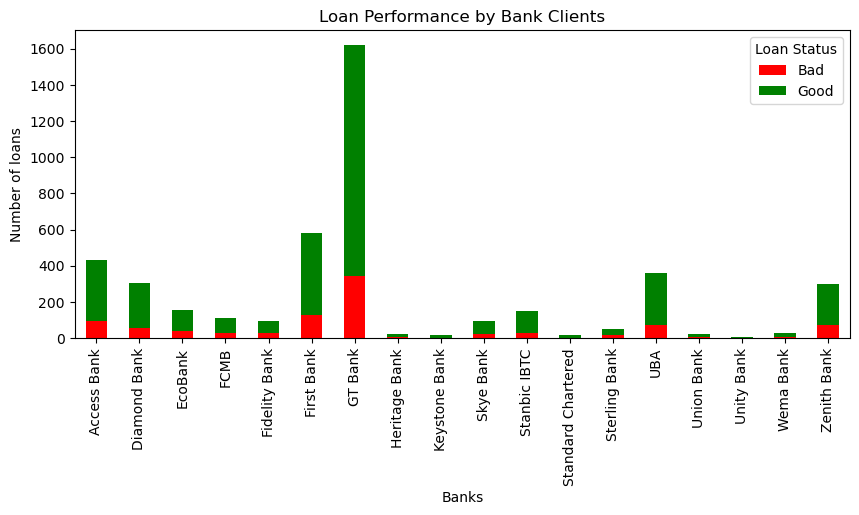

In [98]:
banks_flag.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10,4))
plt.title('Loan Performance by Bank Clients')
plt.xlabel('Banks')
plt.ylabel('Number of loans')
plt.legend(title='Loan Status', loc = 'upper right')
plt.xticks(rotation=90)
plt.show()

#### Comparing the good_bad_flag across banks to check the level of defaulters in each bank


In [99]:
employment_flag = df_merged.groupby(['employment_status_clients', 'good_bad_flag']).size().unstack(fill_value=0)

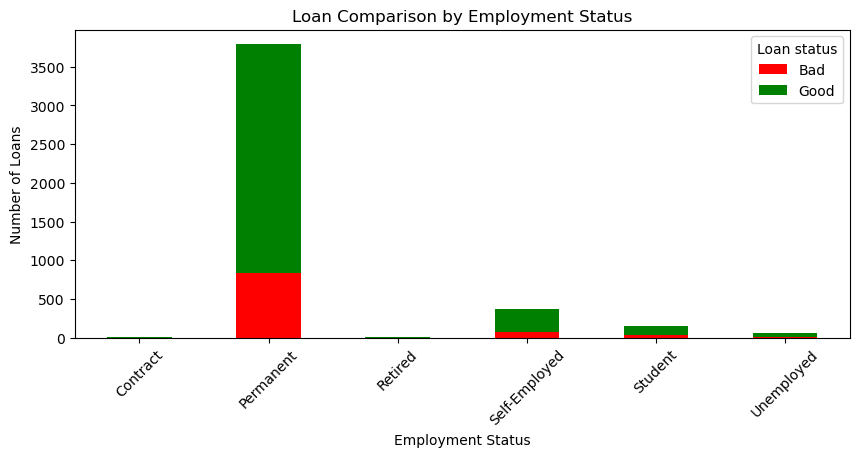

In [100]:
employment_flag.plot(kind='bar', stacked = True, figsize=(10,4), color=['red','green'])
plt.title('Loan Comparison by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Loans')
plt.legend(title='Loan status')
plt.xticks(rotation=45)
plt.show()

In [101]:
education_flag = df_merged.groupby(['level_of_education_clients', 'good_bad_flag']).size().unstack(fill_value=0)


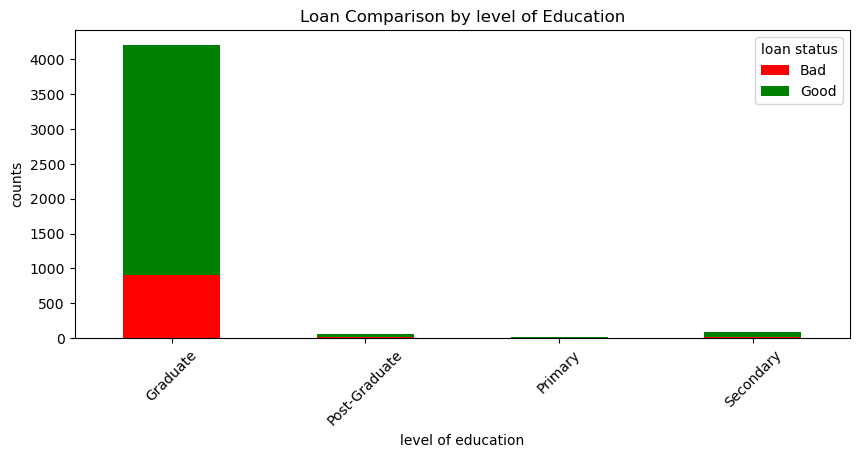

In [102]:
education_flag.plot(kind='bar', stacked=True, figsize=(10,4), color=['red','green'])
plt.title('Loan Comparison by level of Education')
plt.xlabel('level of education')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.legend(title='loan status')
plt.show()


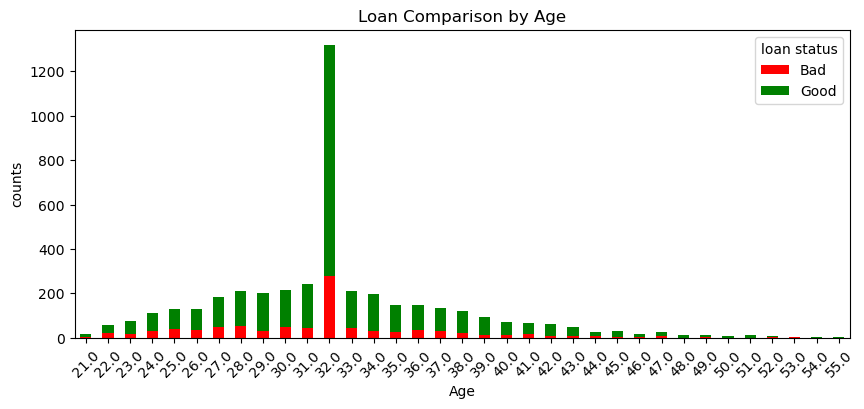

In [103]:
age_flag = df_merged.groupby(['Age', 'good_bad_flag']).size().unstack(fill_value=0)
age_flag.plot(kind='bar', stacked=True, figsize=(10,4), color=['red','green'])
plt.title('Loan Comparison by Age')
plt.xlabel('Age')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.legend(title='loan status')
plt.show()


### Model Training

##### I want to train the model without using the engineered features, to see how the model perform intially

In [104]:
df_merged.columns.tolist()

['customerid',
 'systemloanid',
 'loannumber',
 'approveddate',
 'creationdate',
 'loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'birthdate',
 'bank_account_type',
 'longitude_gps',
 'latitude_gps',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert']

#### Data Preparation

In [105]:
data = ['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'bank_account_type', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients']
df_initial = df_merged[data]

In [106]:
df_initial.columns.tolist()

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients']

In [107]:
df_initial

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients
0,12,30000.0,34500.0,30,Good,Other,Diamond Bank,Permanent,Post-Graduate
1,2,15000.0,17250.0,30,Good,Savings,GT Bank,Permanent,Graduate
2,7,20000.0,22250.0,15,Good,Other,EcoBank,Permanent,Graduate
3,3,10000.0,11500.0,15,Good,Savings,First Bank,Permanent,Graduate
4,9,40000.0,44000.0,30,Good,Other,GT Bank,Permanent,Primary
...,...,...,...,...,...,...,...,...,...
4371,2,10000.0,13000.0,30,Bad,Savings,GT Bank,Permanent,Graduate
4372,2,10000.0,13000.0,30,Bad,Savings,FCMB,Permanent,Graduate
4373,3,10000.0,11500.0,15,Bad,Savings,First Bank,Permanent,Graduate
4374,2,10000.0,13000.0,30,Bad,Savings,Skye Bank,Permanent,Graduate


In [108]:
df_initial.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

In [109]:
df_initial.good_bad_flag = (df_merged.good_bad_flag =='Good').astype(int)

In [110]:
df_initial.good_bad_flag.unique()

array([1, 0])

##### the target column has two value good and bad, we convert them into figure 1=Good and 0=Bad

#### Visualize the target column

In [111]:
df_initial.good_bad_flag.value_counts()

good_bad_flag
1    3423
0     953
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

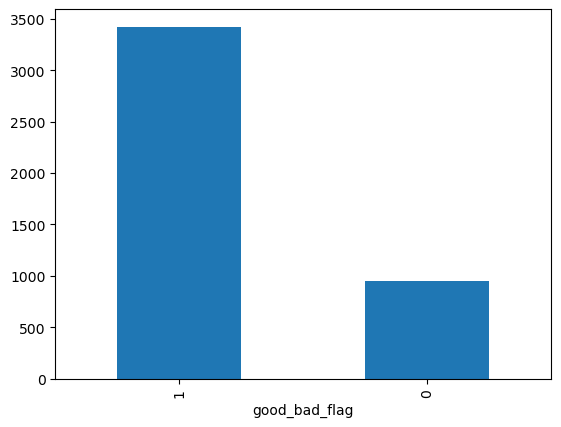

In [112]:
df_initial.good_bad_flag.value_counts().plot(kind='bar')

In [113]:
X = df_initial.drop(columns=['good_bad_flag'])
y= df_initial['good_bad_flag']

#### split into train and test data

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
                                                    random_state = 42, stratify = y)

#### Data Preprocessing

In [116]:
#split into categorical and numerical columns

num_cols = X.select_dtypes(include = np.number).columns.tolist()
cat_cols = X.select_dtypes(include = 'object').columns.tolist()

In [117]:
num_cols

['loannumber', 'loanamount', 'totaldue', 'termdays']

In [118]:
cat_cols

['bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients']

#### Encoding the categorical columns


In [119]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [120]:
ordinal_cols = ['level_of_education_clients']
one_hot_cols = ['bank_account_type', 'bank_name_clients', 'employment_status_clients']



In [121]:
ord_cols = OrdinalEncoder()

ord_train = ord_cols.fit_transform(X_train[ordinal_cols])
ord_test  = ord_cols.transform(X_test[ordinal_cols])

ord_train_df = pd.DataFrame(ord_train, columns=ordinal_cols, index=X_train.index)
ord_test_df  = pd.DataFrame(ord_test,  columns=ordinal_cols, index=X_test.index)


In [122]:
one_hot = OneHotEncoder(sparse_output = False, drop = 'first')

one_hot_train = one_hot.fit_transform(X_train[one_hot_cols])
one_hot_test  = one_hot.transform(X_test[one_hot_cols])

one_hot_train_df = pd.DataFrame(one_hot_train, 
                            columns=one_hot.get_feature_names_out(one_hot_cols), 
                            index=X_train.index)
one_hot_test_df = pd.DataFrame(one_hot_test, 
                           columns=one_hot.get_feature_names_out(one_hot_cols), 
                           index=X_test.index)



##### Scaling the numerical columns

In [123]:
scaler = StandardScaler()

num_train = scaler.fit_transform(X_train[num_cols])
num_test = scaler.transform(X_test[num_cols])

num_train_df = pd.DataFrame(num_train, columns=num_cols, index=X_train.index)
num_test_df  = pd.DataFrame(num_test,  columns=num_cols, index=X_test.index)


##### Combining the encoded columns and scaled columns

In [124]:
X_train = pd.concat([num_train_df, ord_train_df, one_hot_train_df], axis=1)
X_test  = pd.concat([num_test_df,  ord_test_df,  one_hot_test_df], axis=1)


#### Training the model

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model = LogisticRegression()

In [127]:
model.fit(X_train, y_train)

LogisticRegression()

#### Prediction

In [128]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#### Evaluation

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [130]:
data = pd.DataFrame()
data ['Actual'] = y_train
data ['Prediction'] = train_pred
data ['Correct'] = data ['Actual'] == data ['Prediction']

In [131]:
data

,Actual,Prediction,Correct
3296,1,1,True
2917,1,1,True
247,1,1,True
2925,1,1,True
3787,0,1,False
...,...,...,...
283,1,1,True
1324,1,1,True
2825,1,1,True
3347,1,1,True


In [132]:
data.Correct.value_counts()

Correct
True     3080
False     858
Name: count, dtype: int64

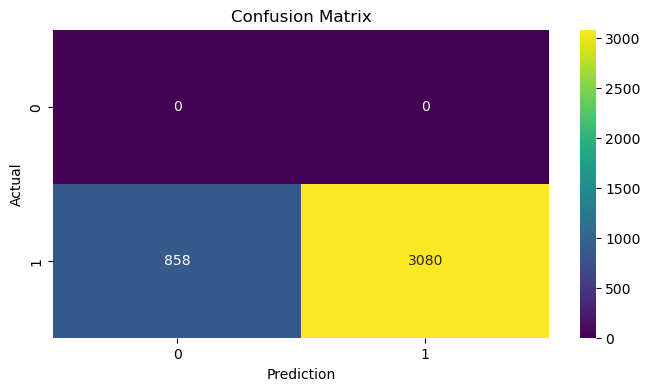

In [133]:
cm = confusion_matrix(train_pred, y_train)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot = True, cmap = 'viridis', fmt ='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [134]:
train_acc = accuracy_score(train_pred, y_train)
test_acc = accuracy_score(test_pred, y_test)

In [135]:
train_acc, test_acc

(0.7821229050279329, 0.7831050228310502)

#### Feature Importance 

In [136]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
feature_importance

,Feature,Coefficient,Abs_Coefficient
6,bank_account_type_Savings,-0.882124,0.882124
1,loanamount,0.729427,0.729427
17,bank_name_clients_Standard Chartered,0.685468,0.685468
25,employment_status_clients_Retired,0.586830,0.586830
27,employment_status_clients_Student,-0.453985,0.453985
18,bank_name_clients_Sterling Bank,-0.439194,0.439194
14,bank_name_clients_Keystone Bank,0.424166,0.424166
10,bank_name_clients_Fidelity Bank,-0.416648,0.416648
5,bank_account_type_Other,-0.402157,0.402157
23,bank_name_clients_Zenith Bank,-0.301642,0.301642


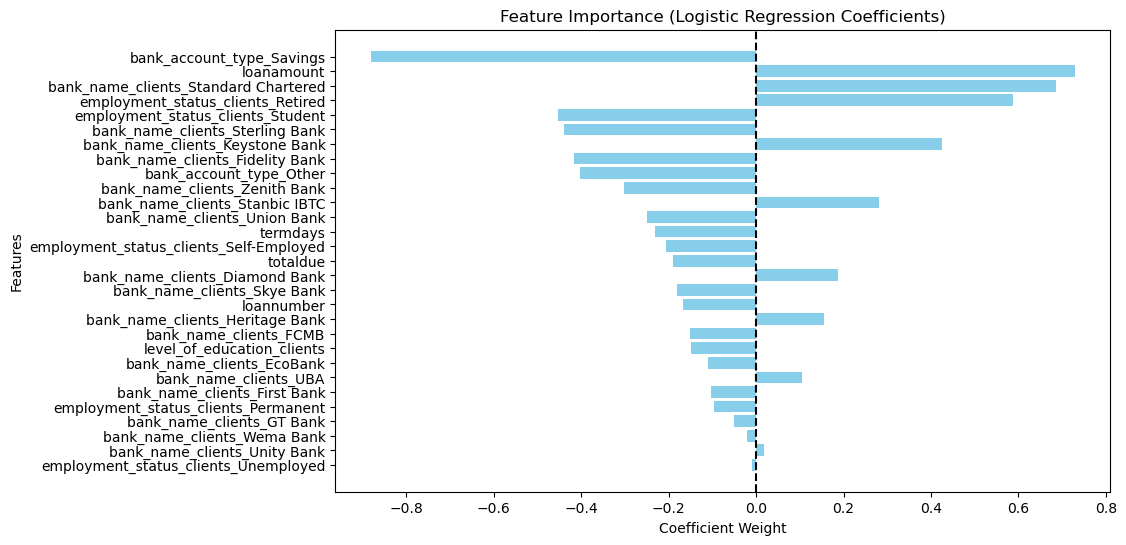

In [137]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color="skyblue")
plt.axvline(x=0, color='k', linestyle='--')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Weight")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


#### Correlation Matrix

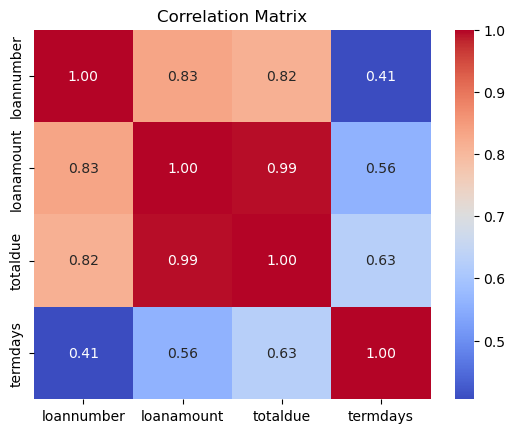

In [138]:
corr_matrix = df_initial[num_cols].corr()

plt.figure(figure=(12,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Training with the feature engineered

In [139]:
df_merged['Age'].max()

55.0

In [140]:
df_merged['Age'].min()

21.0

In [141]:
df_merged['Age'].unique()

array([45., 31., 32., 39., 30., 28., 29., 34., 52., 40., 38., 35., 41.,
       23., 24., 33., 26., 36., 42., 55., 46., 47., 37., 25., 21., 43.,
       22., 50., 27., 51., 44., 49., 48., 53., 54.])

In [142]:
def age_category(value):
    if value <= 25.0:
        return 'Youth'
    elif value <= 35.0:
        return 'Adult'
    elif value <= 45.0:
        return 'Mid-aged'
    else:
        return 'Senior-adult'

In [143]:
df_merged['age_category'] = df_merged['Age'].apply(age_category)

df_merged['age_category']
                                    

0       Mid-aged
1          Adult
2          Adult
3       Mid-aged
4          Adult
          ...   
4371       Adult
4372       Adult
4373       Adult
4374       Adult
4375       Adult
Name: age_category, Length: 4376, dtype: object

In [144]:
df_merged['age_category'].unique()

array(['Mid-aged', 'Adult', 'Senior-adult', 'Youth'], dtype=object)

In [145]:
df_merged.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,...,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,interest,loan_interest_pert,daily_int_pert,age_category
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good,1972-01-15,...,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45.0,4500.0,15.00,0.50,Mid-aged
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good,1985-08-23,...,3.885298,7.320700,GT Bank,Permanent,Graduate,31.0,2250.0,15.00,0.50,Adult
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,Good,1984-09-18,...,11.139350,10.292041,EcoBank,Permanent,Graduate,32.0,2250.0,11.25,0.75,Adult
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,Good,1977-10-10,...,3.985770,7.491708,First Bank,Permanent,Graduate,39.0,1500.0,15.00,1.00,Mid-aged
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,Good,1986-09-07,...,7.457913,9.076574,GT Bank,Permanent,Primary,30.0,4000.0,10.00,0.33,Adult


In [146]:
df_merged.columns.tolist()

['customerid',
 'systemloanid',
 'loannumber',
 'approveddate',
 'creationdate',
 'loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'birthdate',
 'bank_account_type',
 'longitude_gps',
 'latitude_gps',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert',
 'age_category']

##### dropping some columns not needed for prediction

In [147]:
df_merged = df_merged.drop(columns=['customerid', 'systemloanid', 'approveddate', 'creationdate', 'birthdate', 'longitude_gps', 'latitude_gps',])
                        

In [148]:
df_merged.columns.tolist()

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert',
 'age_category']

In [149]:
num_cols = df_merged.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_merged.select_dtypes(include = 'object').columns.tolist()

In [150]:
num_cols

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert']

In [151]:
cat_cols

['good_bad_flag',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'age_category']

In [152]:
df_merged.bank_account_type.unique()

array(['Other', 'Savings', 'Current'], dtype=object)

#### Visualization


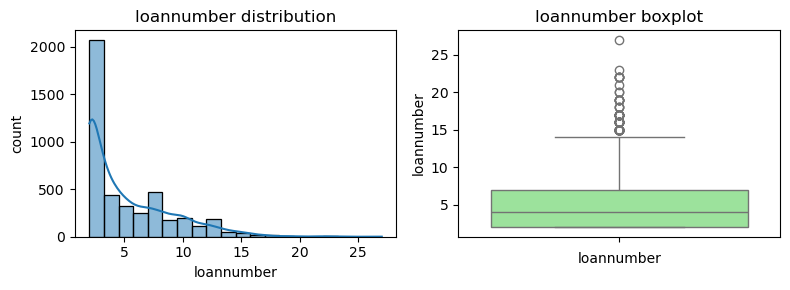

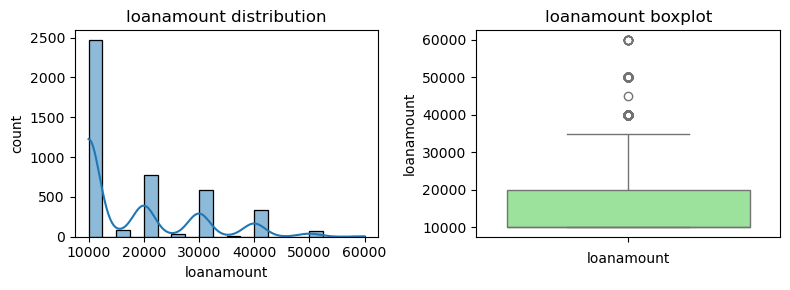

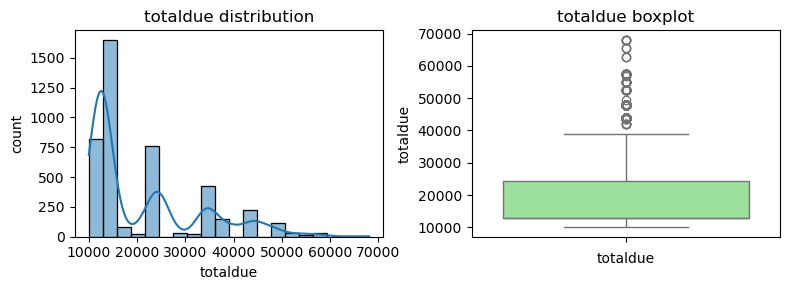

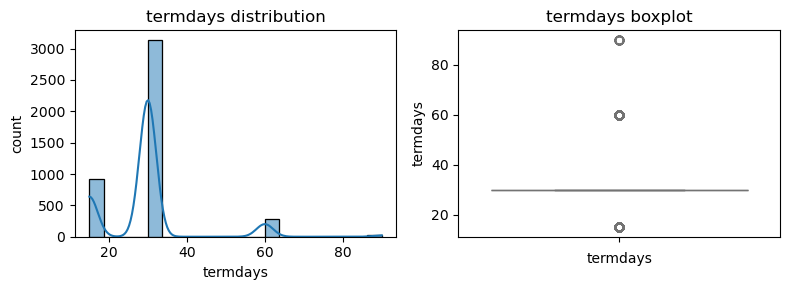

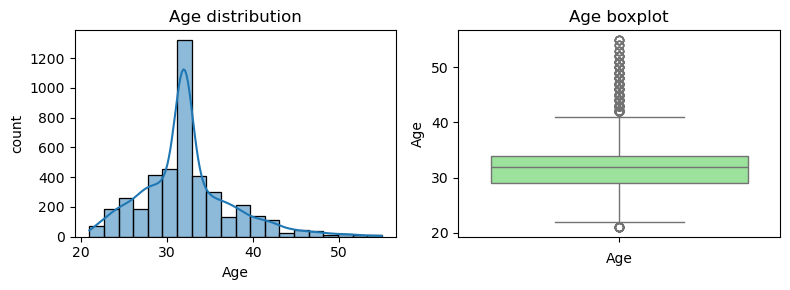

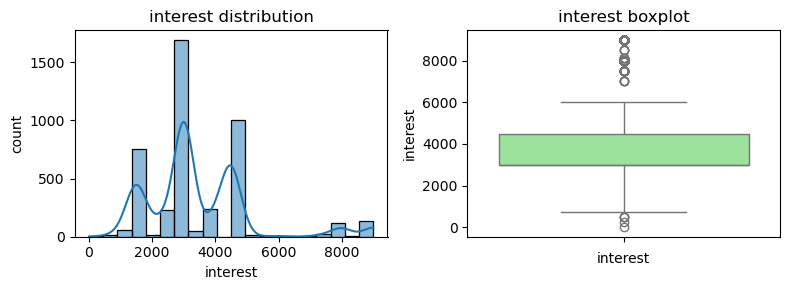

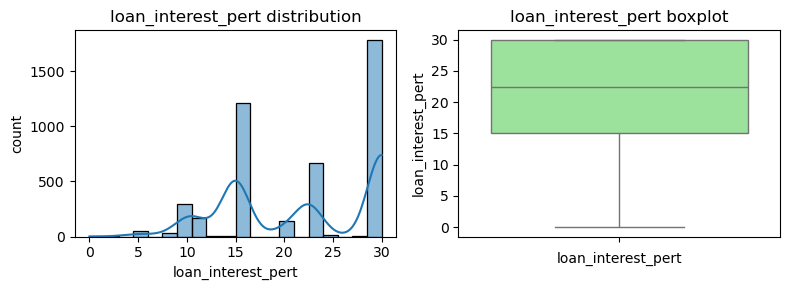

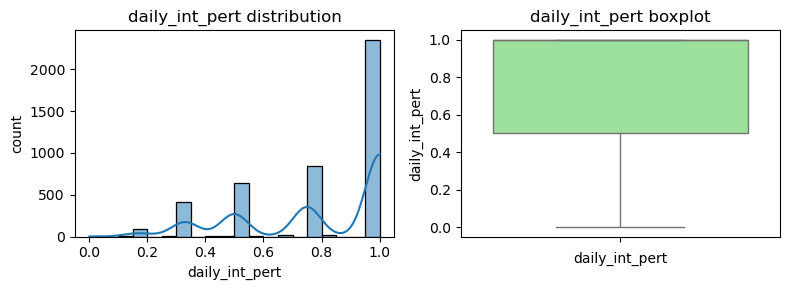

In [153]:
for col in num_cols:
    #plot histogram
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(df_merged[col], kde = True, bins = 20)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')

    #plot boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df_merged[col], color = 'lightgreen')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    
    

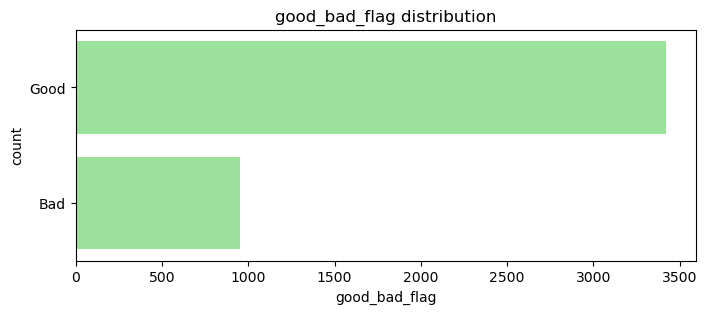

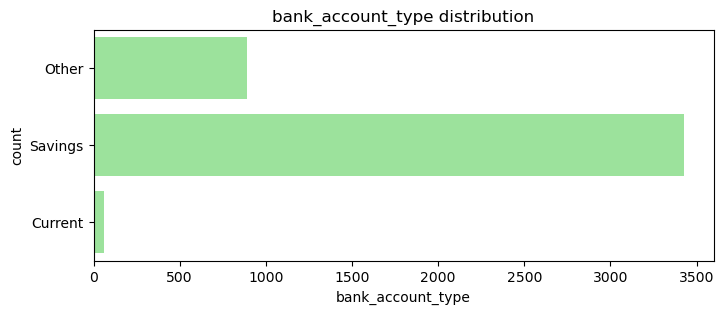

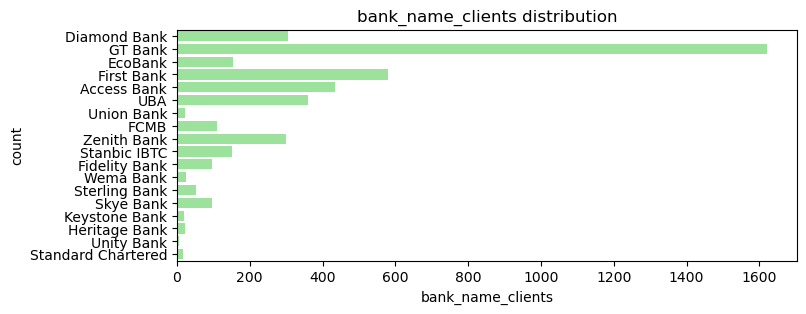

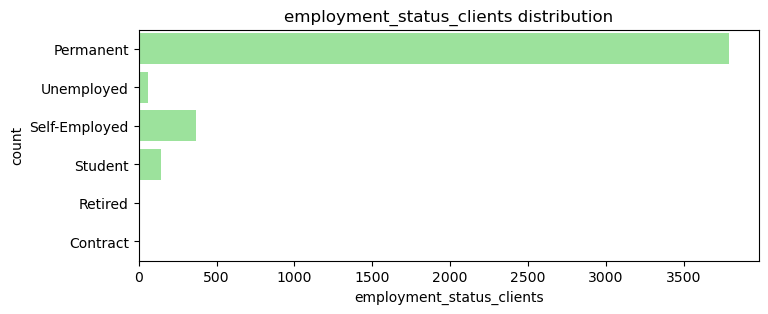

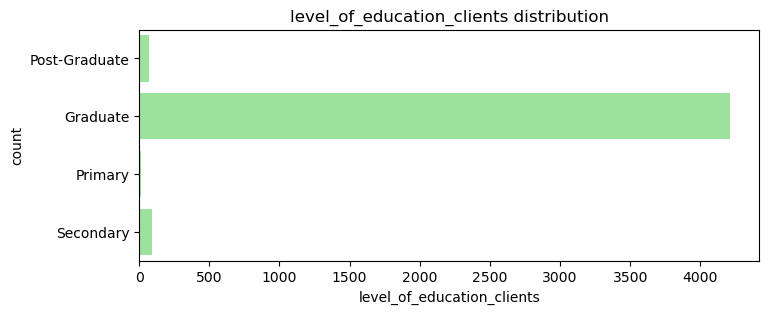

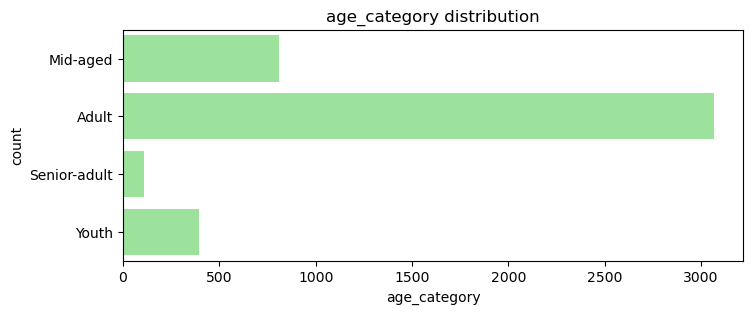

In [154]:
for col in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(df_merged[col], color='lightgreen')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')

#### Detecting and Treating Outliers
- outliers were detected on some columns in the numerical columns using boxplot
- the columns are;
- loannumber
- loanamount
- totaldue
- termdays
- age
- interest

In [155]:
df_merged[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
loannumber,4376.0,5.169333,3.652679,2.0,2.0,4.0,7.0,27.0
loanamount,4376.0,17803.930530,10749.041391,10000.0,10000.0,10000.0,20000.0,60000.0
totaldue,4376.0,21252.565288,11943.706857,10000.0,13000.0,13000.0,24500.0,68100.0
termdays,4376.0,29.266453,11.513424,15.0,30.0,30.0,30.0,90.0
Age,4376.0,32.367687,5.330524,21.0,29.0,32.0,34.0,55.0
interest,4376.0,3448.634758,1692.944524,0.0,3000.0,3000.0,4500.0,9000.0
loan_interest_pert,4376.0,21.781784,7.704275,0.0,15.0,22.5,30.0,30.0
daily_int_pert,4376.0,0.794260,0.255318,0.0,0.5,1.0,1.0,1.0


In [156]:
num_cols

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert']

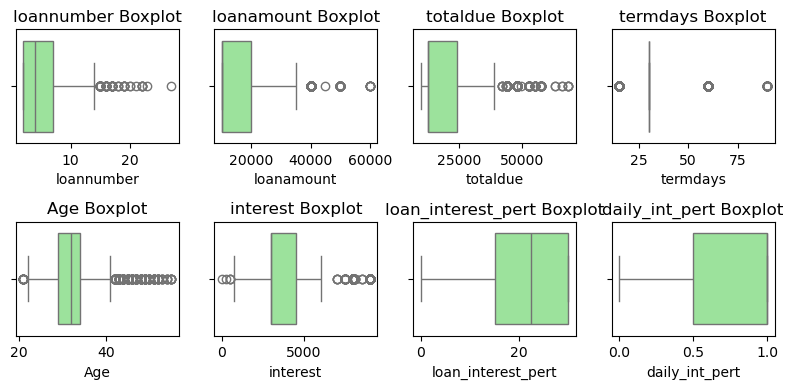

In [157]:
fig, axes = plt.subplots(2, 4, figsize=(8,4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df_merged[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [158]:
outliers_cols = ['loannumber', 'loanamount', 'totaldue', 'termdays', 'Age', 'interest']

for col in outliers_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q2 = df_merged[col].quantile(0.50)
    Q3 = df_merged[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    #..detect outliers
    outliers = df_merged[(df_merged[col] < lower_bound) | (df_merged[col] > upper_bound)]

    #..check the count of outliers in each feature
    outliers_sum = ((df_merged[col] > upper_bound) | (df_merged[col] < lower_bound)).sum()

    #..count of outliers in the entire datsframe
    outliers_sum_all = ((df_merged[col] > upper_bound) | (df_merged[col] < lower_bound)).sum().sum()

    #..using winsorization
    df_merged[col] = df_merged[col].clip(lower = lower_bound, upper = upper_bound)

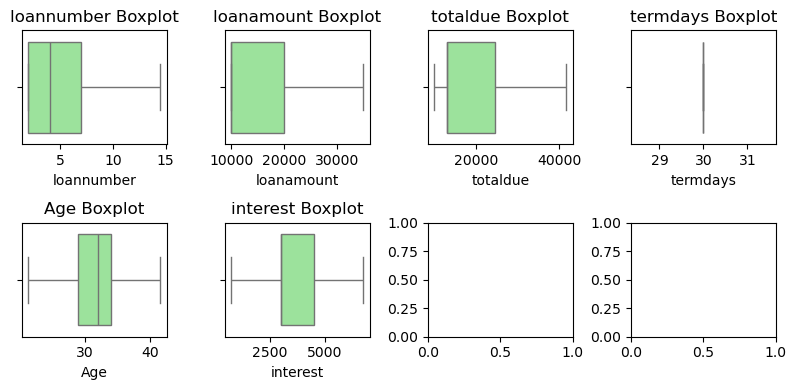

In [159]:
fig, axes = plt.subplots(2, 4, figsize=(8,4))
axes = axes.flatten()

for i, col in enumerate(outliers_cols):
    sns.boxplot(x=df_merged[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [160]:
num_cols

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert']

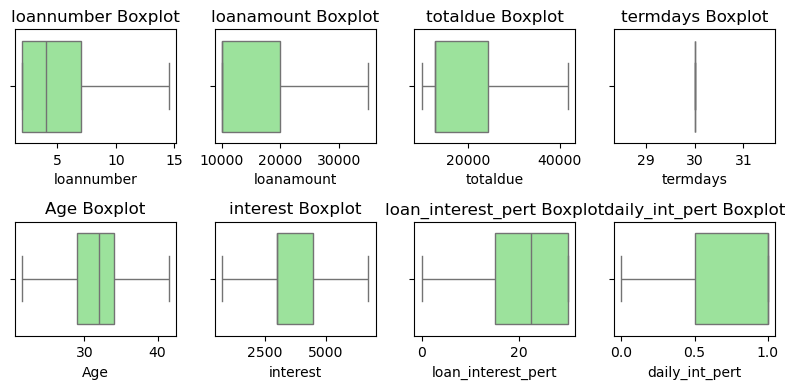

In [161]:
fig, axes = plt.subplots(2, 4, figsize=(8,4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df_merged[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

##### Balance the target column

In [162]:
df_merged.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

In [163]:
df_merged.good_bad_flag.value_counts()

good_bad_flag
Good    3423
Bad      953
Name: count, dtype: int64

In [164]:
df_merged.good_bad_flag = (df_merged.good_bad_flag =='Good').astype(int)

In [165]:
df_merged.good_bad_flag.value_counts()

good_bad_flag
1    3423
0     953
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

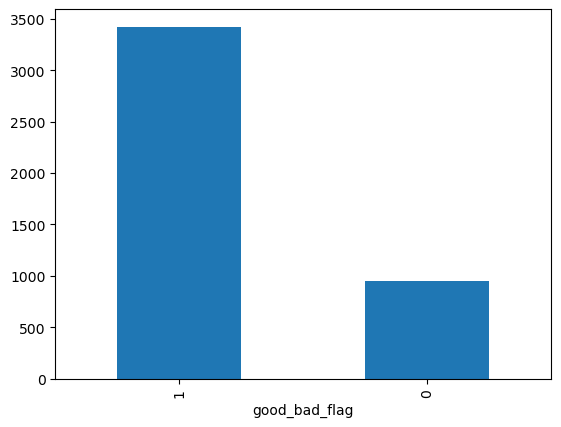

In [166]:
df_merged.good_bad_flag.value_counts().plot(kind='bar')

##### The target column is imbalanced, that can cause oversampling. we would use the SMOTE technique to increase the minority class 

#### Data Preparation

In [167]:
df_merged.columns.tolist()

['loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'Age',
 'interest',
 'loan_interest_pert',
 'daily_int_pert',
 'age_category']

In [168]:
X = df_merged.drop(columns=['good_bad_flag'], axis = 1)
y = df_merged['good_bad_flag']

#### Data Splitting

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y,
                                                    random_state = 42)

#### Encoding

In [170]:
df_merged['level_of_education_clients'].unique()

array(['Post-Graduate', 'Graduate', 'Primary', 'Secondary'], dtype=object)

In [171]:
num_cols = ['loannumber', 'loanamount','totaldue', 'termdays', 'Age', 'interest', 'loan_interest_pert', 'daily_int_pert']
cat_cols = ['bank_name_clients','employment_status_clients','age_category', 'bank_account_type']
education_ord = ['Primary','Secondary', 'Graduate', 'Post-Graduate']

In [172]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#### Pipeline

In [173]:
num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('encoder', OneHotEncoder(sparse_output = False,
                               drop = 'first', handle_unknown = 'ignore'))
])

ordinal_transformer = Pipeline(steps = [
    ('ordinal', OrdinalEncoder(categories = [education_ord]))
])

#### Column Transformer

In [174]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
    ('ord', ordinal_transformer, ['level_of_education_clients'])
])

In [175]:
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loannumber', 'loanamount', 'totaldue',
                                  'termdays', 'Age', 'interest',
                                  'loan_interest_pert', 'daily_int_pert']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['bank_name_clients',
                                  'employment_status_clients', 'age_category',
                                  'bank_account_type']),
                                ('ord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Primary',
                                                                              'Secondary',
                                                                              'Graduate',
                                                                              'Post-Graduate']]))]),
                                 ['level_of_education_clients'])])

In [176]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [177]:
!pip install xgboost

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Model Training

In [179]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [180]:
models = {
    'Logistic Regression' : LogisticRegression(random_state = 42),
    'SVM' : SVC(probability = True),
    'Random Forest' : RandomForestClassifier(random_state = 42),
    'Gradient Boost' : GradientBoostingClassifier(random_state = 42),
    'XGBoost' : XGBClassifier(random_state = 42),
    'LightGBM' : LGBMClassifier(random_state = 42, force_row_wise=True)
}

In [181]:
#...store result
results = {
    'Model' : [],
    'Train Accuracy' : [],
    'Test Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1 Score' : [],
    'ROC AUC Score' : [],
    'Confusion Matrix' : []
}

[LightGBM] [Info] Number of positive: 3080, number of negative: 3080
[LightGBM] [Info] Total Bins 1430
[LightGBM] [Info] Number of data points in the train set: 6160, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


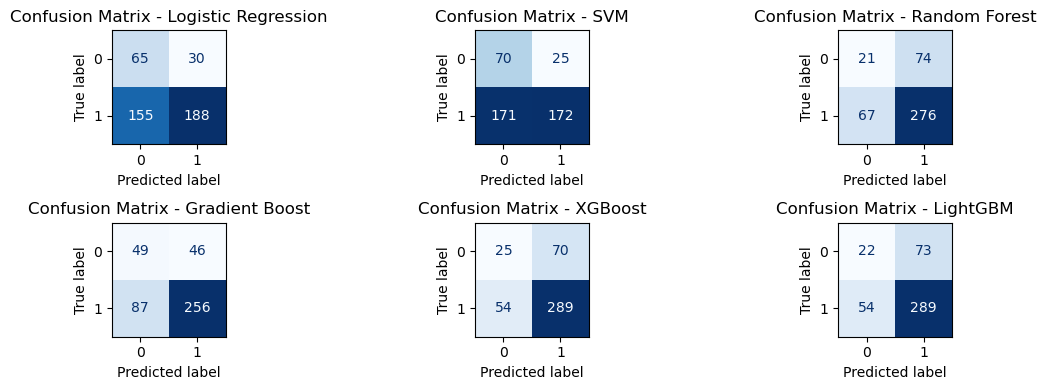

In [182]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state = 42)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    #...Evaluation metrics

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

    y_proba = pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)

    #..Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", ax=axes[i], colorbar=False)
    axes[i].set_title(f"Confusion Matrix - {name}", fontsize= 12)
    
    
    results['Model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC Score'].append(roc_auc)
    results['Confusion Matrix'].append(cm)

plt.tight_layout()
plt.show()

In [183]:
results_df = pd.DataFrame(results)

In [184]:
results_df.round(3)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Confusion Matrix
0,Logistic Regression,0.557,0.578,0.862,0.548,0.670,0.677,"[[65, 30], [155, 188]]"
1,SVM,0.566,0.553,0.873,0.501,0.637,0.650,"[[70, 25], [171, 172]]"
2,Random Forest,0.880,0.678,0.789,0.805,0.797,0.524,"[[21, 74], [67, 276]]"
3,Gradient Boost,0.685,0.696,0.848,0.746,0.794,0.662,"[[49, 46], [87, 256]]"
4,XGBoost,0.808,0.717,0.805,0.843,0.823,0.625,"[[25, 70], [54, 289]]"
5,LightGBM,0.781,0.710,0.798,0.843,0.820,0.624,"[[22, 73], [54, 289]]"


##### Observation
The model was trained with six models and a SMOTE technique was used to balanced the dataset to avoid overfitting of the target column
The LightGBM model performed well compared to the other models comparing the evaluation metrics.


#### Hyperparameter Tuning (Randomized Search CV)

##### I would be selecting the LightGBM model for hyperparameters because of it's high evaluation meterics.

In [185]:
from sklearn.model_selection import RandomizedSearchCV

In [186]:
pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state = 42)),
        ('classifier', LGBMClassifier(random_state = 42, force_row_wise=True))
    ])

param_dist = {
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__n_estimators': randint(100, 1000), 
    'classifier__num_leaves': randint(10, 50),   
    'classifier__max_depth': randint(3, 15),      
    'classifier__min_child_samples': randint(20, 100),
    'classifier__subsample': uniform(0.6, 0.4),       
    'classifier__colsample_bytree': uniform(0.6, 0.4),
    'classifier__reg_alpha': uniform(0, 1),           
    'classifier__reg_lambda': uniform(0, 1)
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1, 
    verbose=2
)

random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3080, number of negative: 3080
[LightGBM] [Info] Total Bins 1426
[LightGBM] [Info] Number of data points in the train set: 6160, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found: {'classifier__colsample_bytree': 0.694899

In [187]:
best_lgbm = random_search.best_estimator_

train_pred = best_lgbm.predict(X_train)
test_pred = best_lgbm.predict(X_test)

test_proba = best_lgbm.predict_proba(X_test)[:, 1]

result = {
    'model' : name,
    'Train Accuracy' : accuracy_score(y_train, train_pred),
    'Test Accuracy' : accuracy_score(y_test, test_pred),
    'Precision' : precision_score(y_test, test_pred),
    'Recall' : recall_score(y_test, test_pred),
    'F1 Score' : f1_score(y_test, test_pred),
    'ROC AUC Score' : roc_auc_score(y_test, test_proba)
}

In [188]:
result_df1 = pd.DataFrame([result])
result_df1.round(3)

,model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,LightGBM,0.753,0.719,0.806,0.845,0.825,0.648


##### Observation
After using the randomized search CV to get the best parameters for tuning the model, the train accuracy and the test accuracy score was 
a little bit better compared to the training without hyperparameters, reducing overfitting and noise in the model.

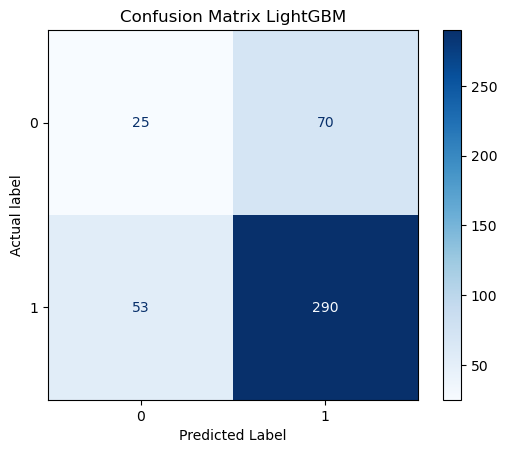

In [189]:
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title(f'Confusion Matrix {name}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')
plt.show()

#### Feature Importance

In [190]:
lgbm_classifier = best_lgbm.named_steps['classifier']

feature_names = best_lgbm.named_steps['preprocessor'].get_feature_names_out()
importances = lgbm_classifier.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)
feat_imp

,Feature,Importance
4,num__Age,730
0,num__loannumber,507
6,num__loan_interest_pert,123
2,num__totaldue,91
13,cat__bank_name_clients_GT Bank,90
5,num__interest,80
7,num__daily_int_pert,78
35,ord__level_of_education_clients,78
12,cat__bank_name_clients_First Bank,76
34,cat__bank_account_type_Savings,73


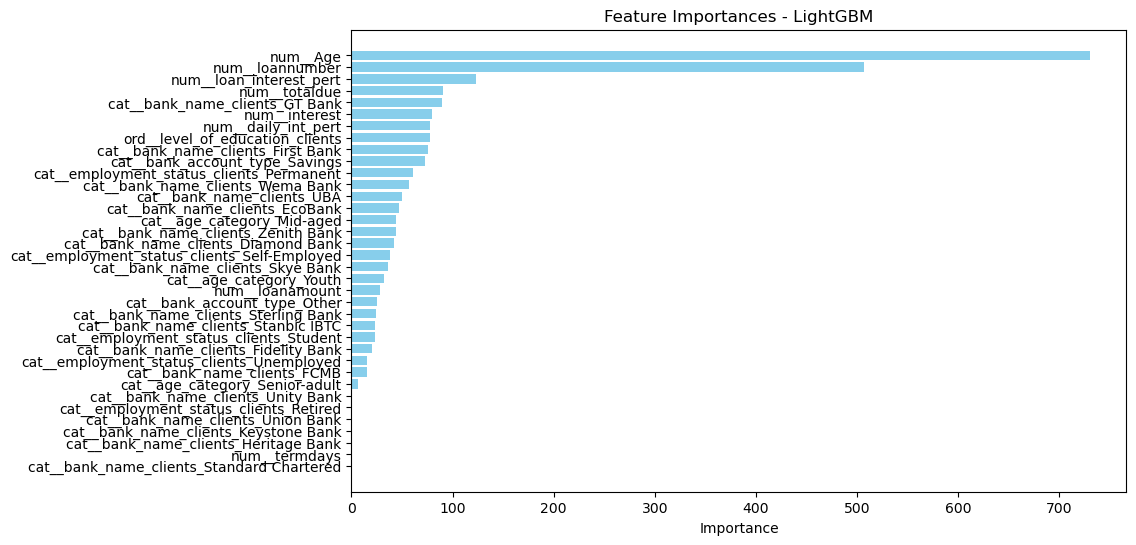

In [191]:
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][::-1], feat_imp['Importance'][::-1], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importances - LightGBM")
plt.show()           

#### Saving and Testing

In [192]:
import joblib
final_model = random_search.best_estimator_
final_model.fit(X,y)


[LightGBM] [Info] Number of positive: 3423, number of negative: 3423
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 6846, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loannumber', 'loanamount',
                                                   'totaldue', 'termdays',
                                                   'Age', 'interest',
                                                   'loan_interest_pert',
                                                   'daily_int_pert']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['bank_name_client...
                                                  ['level_of_education_clients'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.69489963499872,
                                force_row_wise=True,
                                learning_rate=0.07507993963185354, max_depth=6,
                                min_child_samples=27, n_estimators=234,
                                num_leaves=12, random_state=42,
                                reg_alpha=0.6576128923003434,
                                reg_lambda=0.5683086033354716,
                                subsample=0.637469907131237))])

In [201]:
joblib.dump(final_model, "loan_default_risk.pkl")

['loan_default_risk.pkl']

In [4]:
#..New Data
data = {
    'loannumber' : [5],
    'loanamount' : [15000.0],
    'totaldue' : [19500.0],
    'termdays' : [15],
    'bank_account_type' : ['Savings'],
    'bank_name_clients' : ['Diamond Bank'],
    'employment_status_clients' : ['Permanent'],
    'level_of_education_clients' : ['Graduate'],
    'Age' : [32.0],
    'interest' :[4500.0],
    'loan_interest_pert' : [45.0],
    'daily_int_pert' : [0.50],
    'age_category' : ['Mid-aged']
}

In [2]:
#...load saved model
import joblib
import pandas as pd
import numpy as np

model = joblib.load('loan_default_risk.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loannumber', 'loanamount',
                                                   'totaldue', 'termdays',
                                                   'Age', 'interest',
                                                   'loan_interest_pert',
                                                   'daily_int_pert']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['bank_name_client...
                                                  ['level_of_education_clients'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.69489963499872,
                                force_row_wise=True,
                                learning_rate=0.07507993963185354, max_depth=6,
                                min_child_samples=27, n_estimators=234,
                                num_leaves=12, random_state=42,
                                reg_alpha=0.6576128923003434,
                                reg_lambda=0.5683086033354716,
                                subsample=0.637469907131237))])

In [5]:
df = pd.DataFrame(data)
df

,loannumber,loanamount,totaldue,termdays,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,Age,interest,loan_interest_pert,daily_int_pert,age_category
0,5,15000.0,19500.0,15,Savings,Diamond Bank,Permanent,Graduate,32.0,4500.0,45.0,0.5,Mid-aged


In [6]:
default = model.predict(df)
default

array([1])

In [198]:
# data1 = {
#     'loannumber' : [2],
#     'loanamount' : [15000.0],
#     'totaldue' : [17250.0],
#     'termdays' : [30],
#     'bank_account_type' : ['Savings'],
#     'bank_name_clients' : ['GT Bank'],
#     'employment_status_clients' : ['Permanent'],
#     'level_of_education_clients' : ['Graduate'],
#     'Age' : [31.0],
#     'interest' :[2250.0],
#     'loan_interest_pert' : [15.0],
#     'daily_int_pert' : [0.50],
#     'age_category' : ['Adult']
# }

In [199]:
# df1 = pd.DataFrame(data1)
# df1

In [7]:
loan_risk = model.predict(df)

map_label = {
    0 : 'Bad',
    1 : 'Good'
}

prediction = map_label[loan_risk[0]]

print(f'The User loan default risk is: {prediction}')

The User loan default risk is: Good
